<a href="https://colab.research.google.com/github/NikolDrongova/M7DataSP/blob/main/du7_Shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DÚ 7 - Breast Cancer Wisconsin (Diagnostic) Data Set

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data

Cílem je předpovědět, zda se jedná o nezhoubný (B=0) nebo zhoubný (M=1) nádor.



Největší vliv na výsledek mají proměnné texture_mean (směrodatná odchylka hodnot stupňů šedi) a radius_se (vzdálenosti od středu k bodům na obvodu)

Nainstalujeme shap knihovnu

In [1]:
!pip install -qq shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.6 MB/s eta 0:00:00


Načteme všechny knihovny

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import shap

In [4]:
df = pd.read_csv("./data.csv",header = 0)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Trochu čištění

In [ ]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

In [42]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,NaN,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,NaN,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,NaN,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,NaN,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,NaN,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: >

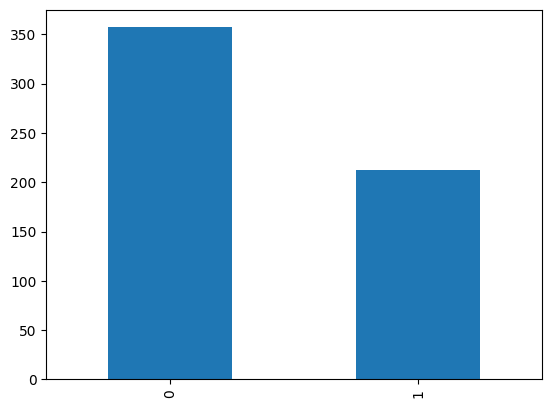

In [9]:
df.diagnosis.value_counts().plot.bar()

In [10]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

x = df.drop(columns=['diagnosis'])
Y = df['diagnosis']

X = ss.fit_transform(x)
X_df = pd.DataFrame(X, columns=x.columns)

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_df, Y, test_size=0.2)
x_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
27,1.273153,0.223480,1.241101,1.248876,-0.139504,0.042812,0.755818,0.732313,-0.418466,-0.823289,...,1.043864,0.257745,0.972174,0.918363,0.062747,-0.270773,0.347396,0.523700,-0.905562,-0.539518
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
306,-0.263364,-0.807410,-0.325363,-0.334435,-0.800631,-0.982274,-1.096530,-1.177705,-0.655777,-0.546856,...,-0.385006,-0.851221,-0.454568,-0.428374,-0.857807,-0.761237,-1.252098,-1.364398,-0.404050,-0.005310
405,-0.905236,-0.162813,-0.888845,-0.810254,0.287488,-0.563636,-0.494155,-0.505540,-1.188815,0.475236,...,-0.801242,-0.015832,-0.729789,-0.717550,0.172337,-0.571667,-0.628420,-0.544141,-1.051162,-0.367175
377,-0.189520,2.075826,-0.250397,-0.263902,-1.508016,-1.081769,-0.955299,-0.973701,-1.426127,-0.732562,...,-0.327023,1.620748,-0.302362,-0.351553,-0.945479,-0.690625,-0.925195,-0.864813,-0.334485,-0.739015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,-0.621222,0.342161,-0.580742,-0.608323,-0.733736,-0.061421,-0.289509,-0.283970,-0.816419,0.689294,...,-0.627292,0.262631,-0.448611,-0.587992,-0.910410,0.171980,-0.171216,0.013609,-0.704957,0.879127
440,-0.896716,-0.486275,-0.833650,-0.805988,-0.513123,0.131884,0.072451,-0.329883,-1.177862,0.510676,...,-0.809525,0.194236,-0.509970,-0.710519,0.295077,0.979241,0.986906,0.622673,-0.583624,0.630310
272,2.164957,0.395683,2.279094,2.377985,-0.167259,1.738969,1.640943,1.544566,-0.330843,-0.121575,...,2.468592,0.407562,2.640181,2.642876,-0.226570,1.388279,1.480091,1.058154,-0.109614,0.256807
354,-0.848433,-1.214647,-0.853833,-0.768730,-1.680948,-0.828198,-0.549271,-0.882390,-0.444023,-0.278929,...,-0.859225,-1.605188,-0.823317,-0.750775,-1.916882,-0.818489,-0.729648,-1.147876,-0.525383,-0.762844


In [12]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(random_state=0, C=10, penalty='l2')
classifier_lr

LogisticRegression(C=10, random_state=0)

In [13]:
classifier_lr.fit(x_train, y_train)

LogisticRegression(C=10, random_state=0)

Accuracy: 96.491 %


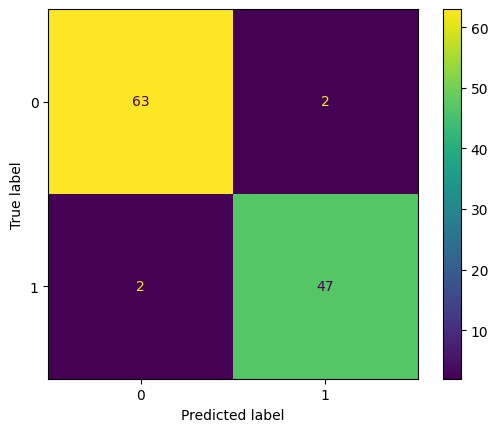

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predicted = classifier_lr.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, predicted)*100:.5} %')

cm = confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()

In [15]:
background_samples = shap.utils.sample(x_test, 1000)

explainer = shap.Explainer(classifier_lr.predict, background_samples)
shap_values = explainer(x_test)
shap_values

.values =
array([[ 0.001875, -0.02375 ,  0.000625, ...,  0.005   , -0.03625 ,
        -0.080625],
       [ 0.005   , -0.011875,  0.003125, ...,  0.005   , -0.013125,
        -0.03875 ],
       [ 0.01    , -0.005   ,  0.00375 , ...,  0.003125, -0.03125 ,
        -0.034375],
       ...,
       [ 0.      ,  0.0075  ,  0.000625, ..., -0.00625 ,  0.10875 ,
         0.070625],
       [ 0.003125, -0.005   ,  0.000625, ...,  0.003125, -0.041875,
        -0.04125 ],
       [-0.001875, -0.000625, -0.003125, ..., -0.00625 ,  0.07    ,
         0.0975  ]])

.base_values =
array([0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45,
       0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45,
       0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45,
       0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45,
       0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45,
       0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0

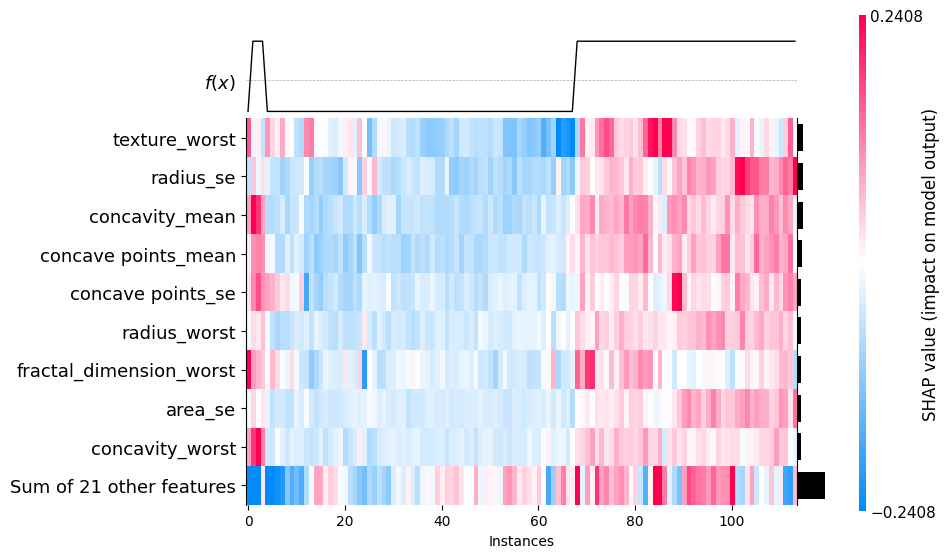

In [16]:
shap.plots.heatmap(shap_values)

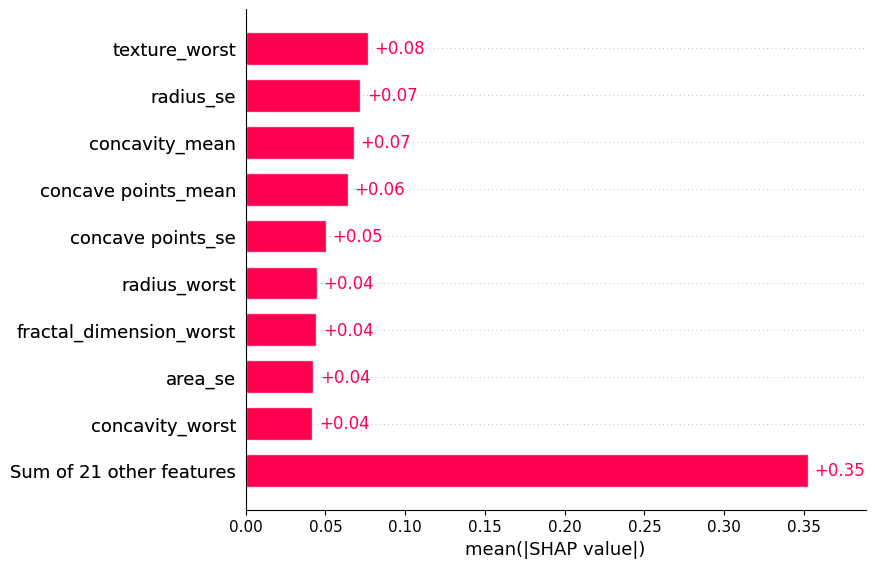

In [20]:
shap.plots.bar(shap_values)

In [17]:
observation_of_interest = 12
x_test.iloc[observation_of_interest]

radius_mean                0.398389
texture_mean               3.320807
perimeter_mean             0.483201
area_mean                  0.256000
smoothness_mean            0.707364
compactness_mean           1.128731
concavity_mean             1.083503
concave points_mean        0.904617
symmetry_mean              1.020006
fractal_dimension_mean     0.524852
radius_se                 -0.589283
texture_se                 0.110941
perimeter_se              -0.476744
area_se                   -0.381005
smoothness_se             -0.565349
compactness_se             0.004575
concavity_se              -0.099594
concave points_se         -0.255665
symmetry_se               -1.282863
fractal_dimension_se      -0.164881
radius_worst               0.459891
texture_worst              3.885905
perimeter_worst            0.567086
area_worst                 0.271451
smoothness_worst           2.451803
compactness_worst          1.922000
concavity_worst            1.430197
concave points_worst       1

In [18]:
y_test.iloc[observation_of_interest]

1

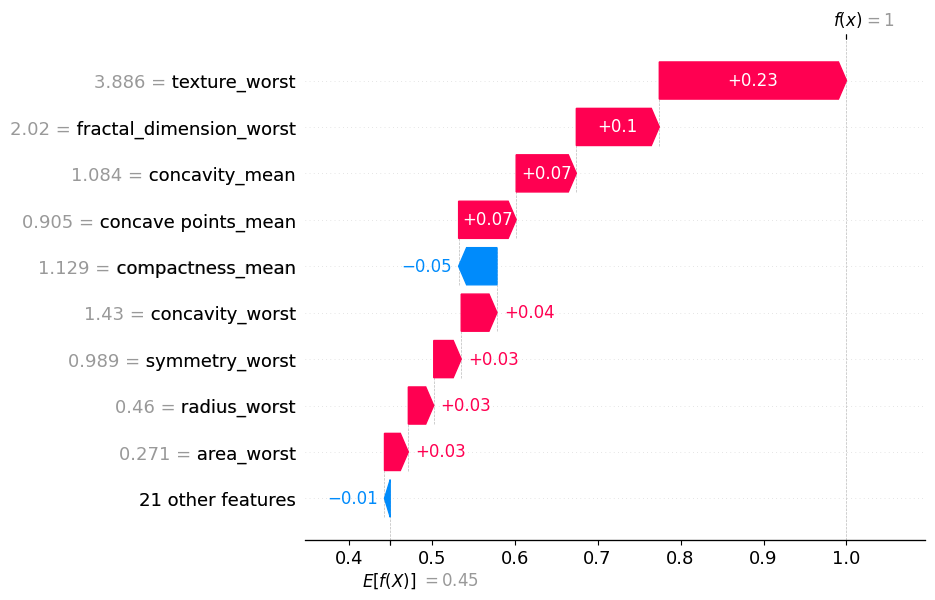

In [19]:
shap_value = shap_values[observation_of_interest]
shap.plots.waterfall(shap_value)

In [23]:
observation_of_interest = 40
x_test.iloc[observation_of_interest]

radius_mean               -0.146918
texture_mean               1.256698
perimeter_mean            -0.173371
area_mean                 -0.234039
smoothness_mean           -0.269025
compactness_mean          -0.487451
concavity_mean            -0.451343
concave points_mean       -0.466075
symmetry_mean             -0.184806
fractal_dimension_mean    -0.212302
radius_se                 -0.628624
texture_se                -0.384375
perimeter_se              -0.551493
area_se                   -0.451191
smoothness_se             -0.984366
compactness_se            -0.767818
concavity_se              -0.462001
concave points_se         -0.797445
symmetry_se               -0.885362
fractal_dimension_se      -0.881289
radius_worst               0.128559
texture_worst              1.622376
perimeter_worst            0.176892
area_worst                -0.056048
smoothness_worst           0.645764
compactness_worst          0.217146
concavity_worst            0.515309
concave points_worst       0

In [24]:
y_test.iloc[observation_of_interest]

1

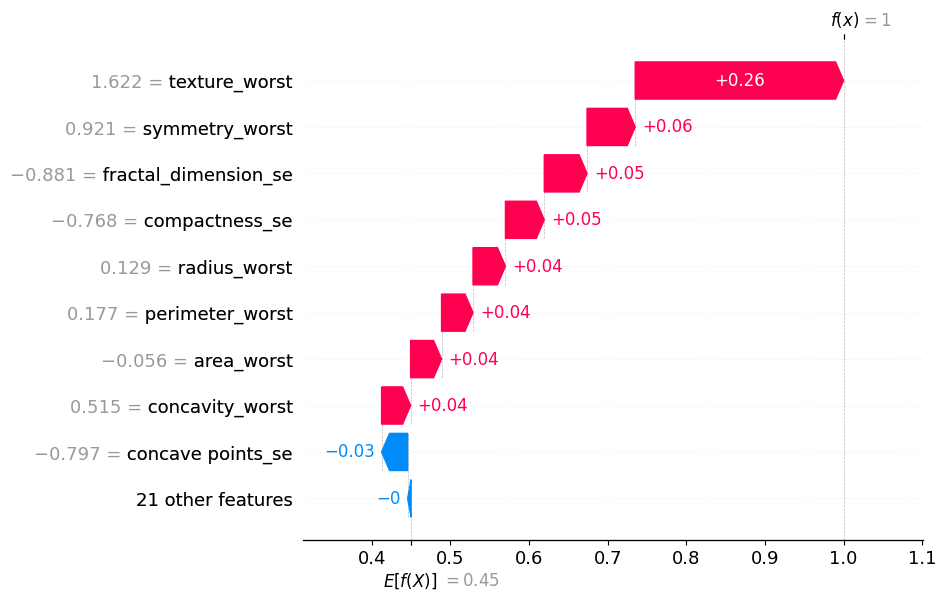

In [25]:
shap_value = shap_values[observation_of_interest]
shap.plots.waterfall(shap_value)

In [27]:
observation_of_interest = 100
x_test.iloc[observation_of_interest]

radius_mean               -0.533178
texture_mean              -0.314072
perimeter_mean            -0.564266
area_mean                 -0.553431
smoothness_mean           -0.698865
compactness_mean          -0.711647
concavity_mean            -0.627112
concave points_mean       -0.660562
symmetry_mean              0.578241
fractal_dimension_mean    -0.073377
radius_se                 -0.668325
texture_se                -0.425561
perimeter_se              -0.684162
area_se                   -0.524236
smoothness_se             -0.507680
compactness_se            -0.550967
concavity_se              -0.396350
concave points_se         -0.628098
symmetry_se               -0.309029
fractal_dimension_se      -0.495851
radius_worst              -0.554813
texture_worst             -0.074456
perimeter_worst           -0.615412
area_worst                -0.556174
smoothness_worst          -0.467667
compactness_worst         -0.480063
concavity_worst           -0.373672
concave points_worst      -0

In [28]:
y_test.iloc[observation_of_interest]

0

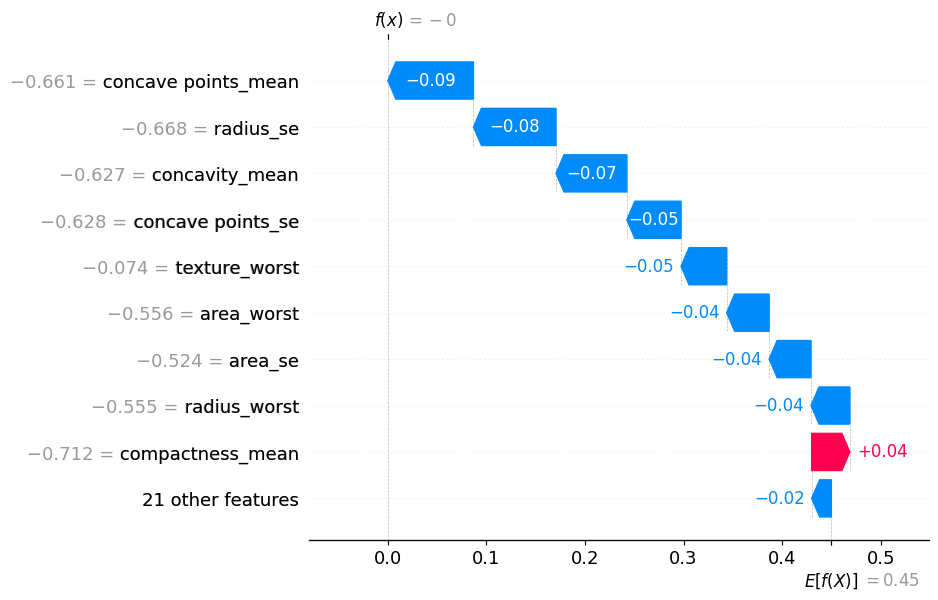

In [29]:
shap_value = shap_values[observation_of_interest]
shap.plots.waterfall(shap_value)

In [34]:
import time
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(classifier_lr,
                                x_test,
                                y_test,
                                n_repeats=20,
                                # random_state=42,
                                n_jobs=2)

elapsed_time = time.time() - start_time
print(f'Elapsed time to compute the importances: {elapsed_time:.3f} seconds')

result


Elapsed time to compute the importances: 6.130 seconds


{'importances_mean': array([0.        , 0.        , 0.        , 0.        , 0.0004386 ,
        0.02061404, 0.03903509, 0.0372807 , 0.00131579, 0.0004386 ,
        0.06008772, 0.00964912, 0.00570175, 0.03245614, 0.        ,
        0.00921053, 0.        , 0.01359649, 0.00350877, 0.0122807 ,
        0.03026316, 0.03991228, 0.02368421, 0.02894737, 0.00131579,
        0.00394737, 0.01929825, 0.        , 0.02149123, 0.02280702]),
 'importances_std': array([0.        , 0.        , 0.        , 0.        , 0.0019118 ,
        0.00844797, 0.01829005, 0.0195901 , 0.0074819 , 0.0019118 ,
        0.02153594, 0.00728651, 0.00844797, 0.01470443, 0.        ,
        0.00939662, 0.        , 0.01427293, 0.00511487, 0.00803961,
        0.01285469, 0.01951138, 0.01304041, 0.01470443, 0.00313221,
        0.00517098, 0.00944766, 0.        , 0.01224148, 0.01088568]),
 'importances': array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0. 

In [40]:
feature_importances = pd.Series(result.importances_mean, index=df.columns[1:31])
feature_importances

radius_mean                0.000000
texture_mean               0.000000
perimeter_mean             0.000000
area_mean                  0.000000
smoothness_mean            0.000439
compactness_mean           0.020614
concavity_mean             0.039035
concave points_mean        0.037281
symmetry_mean              0.001316
fractal_dimension_mean     0.000439
radius_se                  0.060088
texture_se                 0.009649
perimeter_se               0.005702
area_se                    0.032456
smoothness_se              0.000000
compactness_se             0.009211
concavity_se               0.000000
concave points_se          0.013596
symmetry_se                0.003509
fractal_dimension_se       0.012281
radius_worst               0.030263
texture_worst              0.039912
perimeter_worst            0.023684
area_worst                 0.028947
smoothness_worst           0.001316
compactness_worst          0.003947
concavity_worst            0.019298
concave points_worst       0

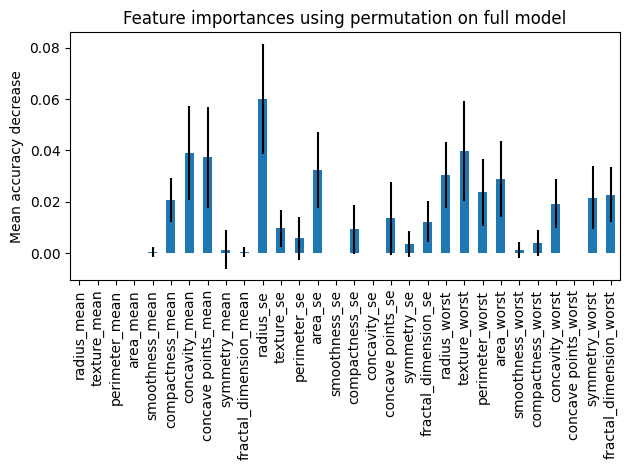

In [41]:
fig, ax = plt.subplots()
feature_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title('Feature importances using permutation on full model')
ax.set_ylabel('Mean accuracy decrease')
fig.tight_layout()
plt.show()